Neste notebook é comparado o rendimento de uma carteira com os rendimentos do IBOV, dólar e uma aproximação de CDI.

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import quandl

## Download dos dados

In [2]:
# os papeis que utilizaremos
stocks = ['VALE3.SA', 'ITUB4.SA', 'BBDC4.SA', 'ABEV3.SA', 'PETR4.SA', 'MGLU3.SA']

In [3]:
# definir início e fim dos dados históricos
start_date = '2015-01-01'
end_date = '2022-01-01'

In [14]:
# download dos dados
adj_close = pd.DataFrame()

for stock in stocks:
    adj_close[stock] = yf.download(stock, start_date, end_date)['Adj Close'] # it is more accurate reflection of the stock's value. takes into account factors such as dividents, stick splits, ...

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [15]:
adj_close

,VALE3.SA,ITUB4.SA,BBDC4.SA,ABEV3.SA,PETR4.SA,MGLU3.SA
Date,,,,,,
2015-01-02,14.682982,13.574775,11.977681,12.145535,7.057713,0.215259
2015-01-05,14.462180,13.642989,12.001722,11.925673,6.454490,0.219304
2015-01-06,15.041773,13.863686,12.396540,12.380562,6.243361,0.216414
2015-01-07,15.593765,14.365267,12.889185,12.554936,6.537433,0.223638
2015-01-08,15.759363,14.589969,12.955578,13.311452,6.959689,0.221905
...,...,...,...,...,...,...
2021-12-23,79.150002,21.322021,19.221460,15.550000,28.330000,6.200000
2021-12-27,78.949997,21.541836,19.441246,15.530000,28.750000,6.780000
2021-12-28,77.050003,21.461903,19.371315,15.520000,28.780001,6.830000


## Valor aportado por ativo

In [84]:
compras = {'VALE3.SA':2500, 'ITUB4.SA':1000, 'BBDC4.SA':1000, 
           'ABEV3.SA':2000, 'PETR4.SA':3000, 'MGLU3.SA':500}
           
compras_df = pd.Series(data=compras, index=list(compras.keys()))

In [85]:
compras_df.sum() # valor total aportado

10000

In [86]:
primeiro_preco = adj_close.iloc[0] # preço do ativo no dia que foi realizada a compra
primeiro_preco

VALE3.SA    14.682982
ITUB4.SA    13.574775
BBDC4.SA    11.977681
ABEV3.SA    12.145535
PETR4.SA     7.057713
MGLU3.SA     0.215259
Name: 2015-01-02 00:00:00, dtype: float64

In [87]:
qtd_acoes = compras_df / primeiro_preco
qtd_acoes

VALE3.SA     170.265136
ITUB4.SA      73.666047
BBDC4.SA      83.488614
ABEV3.SA     164.669562
PETR4.SA     425.066900
MGLU3.SA    2322.788068
dtype: float64

## Tabela do valor aportado total

In [88]:
aportado_total = adj_close * qtd_acoes
aportado_total

,VALE3.SA,ITUB4.SA,BBDC4.SA,ABEV3.SA,PETR4.SA,MGLU3.SA
Date,,,,,,
2015-01-02,2500.000000,1000.000000,1000.000000,2000.000000,3000.000000,500.000000
2015-01-05,2462.405065,1005.025086,1002.007164,1963.795423,2743.590137,509.395977
2015-01-06,2561.089496,1021.282922,1034.969918,2038.701688,2653.846107,502.684525
2015-01-07,2655.074560,1058.232425,1076.100188,2067.415873,2778.846445,519.464158
2015-01-08,2683.270111,1074.785325,1081.643239,2191.990949,2958.333288,515.437336
...,...,...,...,...,...,...
2021-12-23,13476.485759,1570.709046,1604.773085,2560.611713,12042.145257,14401.285582
2021-12-27,13442.431952,1586.901897,1623.122687,2557.318246,12220.673388,15748.503592
2021-12-28,13118.929233,1581.013536,1617.284243,2555.671670,12233.425687,15864.642331


In [89]:
aportado_total['total'] = aportado_total.sum(axis = 1)

In [90]:
aportado_total

,VALE3.SA,ITUB4.SA,BBDC4.SA,ABEV3.SA,PETR4.SA,MGLU3.SA,total
Date,,,,,,,
2015-01-02,2500.000000,1000.000000,1000.000000,2000.000000,3000.000000,500.000000,10000.000000
2015-01-05,2462.405065,1005.025086,1002.007164,1963.795423,2743.590137,509.395977,9686.218853
2015-01-06,2561.089496,1021.282922,1034.969918,2038.701688,2653.846107,502.684525,9812.574655
2015-01-07,2655.074560,1058.232425,1076.100188,2067.415873,2778.846445,519.464158,10155.133650
2015-01-08,2683.270111,1074.785325,1081.643239,2191.990949,2958.333288,515.437336,10505.460249
...,...,...,...,...,...,...,...
2021-12-23,13476.485759,1570.709046,1604.773085,2560.611713,12042.145257,14401.285582,45656.010441
2021-12-27,13442.431952,1586.901897,1623.122687,2557.318246,12220.673388,15748.503592,47178.951762
2021-12-28,13118.929233,1581.013536,1617.284243,2555.671670,12233.425687,15864.642331,46970.966700


In [91]:
# quanto aumentou o rendimento em relação ao aportado inicialmente

aportado_total['total'][-1] / aportado_total['total'][0]

4.782103174914021

## Comparativo com CDB & IBOV

In [92]:
cdi = quandl.get("BCB/1161", start_date = start_date)
cdi.rename(columns = {'Value': 'CDI'}, inplace = True) # renomeando as colunas
cdi = cdi[~(cdi == 0).any(axis = 1)] # removendo os valores 0

<AxesSubplot:xlabel='Date'>

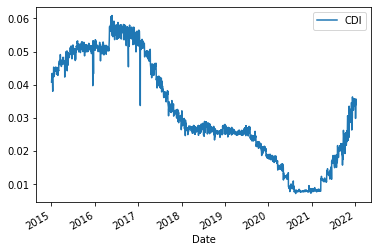

In [93]:
cdi.plot()

In [94]:
benchmarks = ['^BVSP', 'USDBRL=X']

benchs = pd.DataFrame()

for bench in benchmarks:
    benchs[bench] = yf.download(bench, start = start_date, end = end_date)['Adj Close']

benchs = pd.merge(benchs, cdi, how = 'inner', on = 'Date')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [95]:
df = pd.merge(benchs, aportado_total, how = 'inner', on = 'Date')

In [96]:
df

,^BVSP,USDBRL=X,CDI,VALE3.SA,ITUB4.SA,BBDC4.SA,ABEV3.SA,PETR4.SA,MGLU3.SA,total
Date,,,,,,,,,,
2015-01-02,48512.0,2.6532,0.0408,2500.000000,1000.000000,1000.000000,2000.000000,3000.000000,500.000000,10000.000000
2015-01-05,47517.0,2.6912,0.0428,2462.405065,1005.025086,1002.007164,1963.795423,2743.590137,509.395977,9686.218853
2015-01-06,48001.0,2.7031,0.0433,2561.089496,1021.282922,1034.969918,2038.701688,2653.846107,502.684525,9812.574655
2015-01-07,49463.0,2.6966,0.0434,2655.074560,1058.232425,1076.100188,2067.415873,2778.846445,519.464158,10155.133650
2015-01-08,49943.0,2.6808,0.0430,2683.270111,1074.785325,1081.643239,2191.990949,2958.333288,515.437336,10505.460249
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,104891.0,5.6530,0.0357,13476.485759,1570.709046,1604.773085,2560.611713,12042.145257,14401.285582,45656.010441
2021-12-27,105531.0,5.6711,0.0354,13442.431952,1586.901897,1623.122687,2557.318246,12220.673388,15748.503592,47178.951762
2021-12-28,104864.0,5.6241,0.0347,13118.929233,1581.013536,1617.284243,2555.671670,12233.425687,15864.642331,46970.966700


In [97]:
# considerando criação de CDB fictício para 1 real no primeiro dia

lista = []

for i in range(len(df)):
    if i == 0:
        lista.append(1)
    else:
        lista.append( (lista[i-1])*(1+(df.CDI.iloc[i-1])/100) ) # aproximação de CDB
        
df['CDB_100%_CDI'] = lista

In [98]:
# normalizando todos nossos dados

df_normalizado = df / df.iloc[0]

In [99]:
df_normalizado

,^BVSP,USDBRL=X,CDI,VALE3.SA,ITUB4.SA,BBDC4.SA,ABEV3.SA,PETR4.SA,MGLU3.SA,total,CDB_100%_CDI
Date,,,,,,,,,,,
2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-05,0.979490,1.014322,1.049020,0.984962,1.005025,1.002007,0.981898,0.914530,1.018792,0.968622,1.000408
2015-01-06,0.989467,1.018807,1.061275,1.024436,1.021283,1.034970,1.019351,0.884615,1.005369,0.981257,1.000836
2015-01-07,1.019603,1.016358,1.063725,1.062030,1.058232,1.076100,1.033708,0.926282,1.038928,1.015513,1.001270
2015-01-08,1.029498,1.010403,1.053922,1.073308,1.074785,1.081643,1.095995,0.986111,1.030875,1.050546,1.001704
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,2.162166,2.130635,0.875000,5.390594,1.570709,1.604773,1.280306,4.014048,28.802571,4.565601,1.738705
2021-12-27,2.175359,2.137457,0.867647,5.376973,1.586902,1.623123,1.278659,4.073558,31.497007,4.717895,1.739326
2021-12-28,2.161609,2.119742,0.850490,5.247572,1.581014,1.617284,1.277836,4.077809,31.729285,4.697097,1.739941


In [100]:
df_normalizado.rename(columns = {'^BVSP': 'IBOV', 'USDBRL=X': 'Dólar', 
                                 'total': 'Nossa Carteira'}, inplace = True)

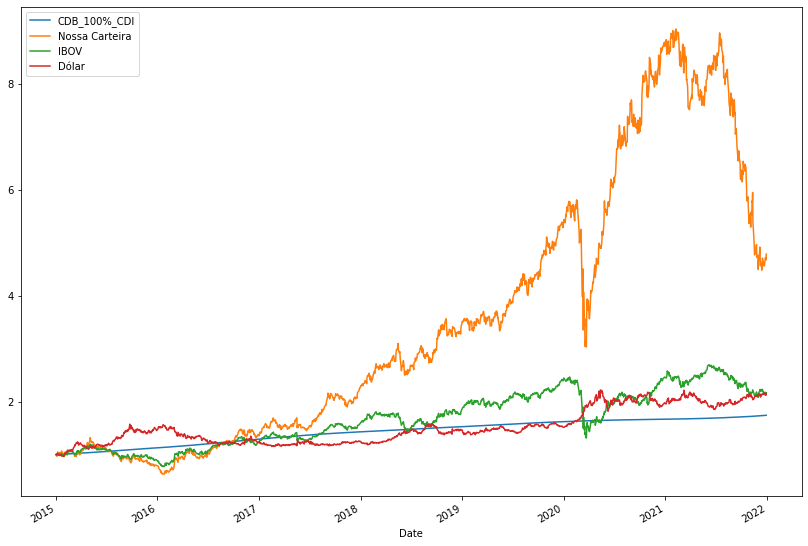

In [101]:
df_normalizado[['CDB_100%_CDI', 'Nossa Carteira', 'IBOV', 'Dólar']].plot(figsize = (14,10));